In [8]:
import pandas as pd
import json
from shapely.geometry import Point, Polygon

In [9]:
file_name = 'Competitor_modified'
df = pd.read_csv(file_name + '.csv')
df.head()

,Unnamed: 0,address,name,rating,users_rating_num,lat,lng,name_s
0,0,"Am Suteracher 14, 8048 Zürich, Switzerland",Coop Supermarkt Zürich Suteracher,4.1,137,47.389955,8.472095,Coop
1,1,"Badenerstrasse 244, 8004 Zürich, Switzerland",Coop Supermarkt Zürich Lochergut,4.2,662,47.375734,8.517334,Coop
2,2,"Badenerstrasse 333, 8003 Zürich, Switzerland",Coop Supermarkt Zürich Albisriederplatz,4.1,749,47.377711,8.511107,Coop
3,3,"Bahnhofbrücke 1, 8001 Zürich, Switzerland",Coop Supermarkt Zürich Bahnhofbrücke,4.3,3000,47.376458,8.542357,Coop
4,4,"Birmensdorferstrasse 200, 8003 Zürich, Switzer...",Coop Supermarkt Zürich Wiedikon,4.3,646,47.370796,8.516052,Coop


In [10]:
# Open json and set ID:

with open('stadtkreise.json') as json_file:
    stadtkreise = json.load(json_file)

def set_ID(kreis):
    for i in range(len(kreis['features'])):
        kreis['features'][i]['id'] = kreis['features'][i]['properties']['name']
    return kreis

stadtkreise = set_ID(stadtkreise)
# stadtkreise

11


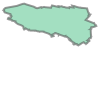

In [11]:
# Create Polynome and save it in JSON-dict:

size_stadtkreise = len(stadtkreise['features'])

# Covert list of lists to list of touples:
for i_kreis in range(size_stadtkreise):
    coords_list = []
    for coord in stadtkreise['features'][i_kreis]['geometry']['coordinates'][0]:
        lng = coord[0]
        lan = coord[1]
        coords_list.append((lng, lan))
    stadtkreise['features'][i_kreis]['polygone'] = Polygon(coords_list)


# How it looks like:
print(stadtkreise['features'][1]['id'])
stadtkreise['features'][1]['polygone']

In [12]:
# Identify which points in which Kreis:

def find_Kreis(lng_store, lat_store):
    point = Point(lng_store, lat_store)
    
    for i_kreis in range(size_stadtkreise):
        poly = stadtkreise['features'][i_kreis]['polygone']
        if point.within(poly):
            return stadtkreise['features'][i_kreis]['id']
    return '-'

In [13]:
# Save the Kreis-number in DataFrame:

set_id = lambda row: find_Kreis(row.lng, row.lat)

df['Kreis_id'] = df[['lat', 'lng']].apply(set_id, axis=1)

In [14]:
# Remove the Points outside all Polygones:

df = df.drop(df[df['Kreis_id'] == '-'].index)
df

,Unnamed: 0,address,name,rating,users_rating_num,lat,lng,name_s,Kreis_id
0,0,"Am Suteracher 14, 8048 Zürich, Switzerland",Coop Supermarkt Zürich Suteracher,4.1,137,47.389955,8.472095,Coop,9
1,1,"Badenerstrasse 244, 8004 Zürich, Switzerland",Coop Supermarkt Zürich Lochergut,4.2,662,47.375734,8.517334,Coop,4
2,2,"Badenerstrasse 333, 8003 Zürich, Switzerland",Coop Supermarkt Zürich Albisriederplatz,4.1,749,47.377711,8.511107,Coop,3
3,3,"Bahnhofbrücke 1, 8001 Zürich, Switzerland",Coop Supermarkt Zürich Bahnhofbrücke,4.3,3000,47.376458,8.542357,Coop,1
4,4,"Birmensdorferstrasse 200, 8003 Zürich, Switzer...",Coop Supermarkt Zürich Wiedikon,4.3,646,47.370796,8.516052,Coop,3
...,...,...,...,...,...,...,...,...,...
107,5,"Neunbrunnenstrasse 40, 8050 Zürich, Switzerland",Spar Express Neunbrunnenstrasse,5.0,25,47.417332,8.540567,Spar,11
108,6,"Regensbergstrasse 300, 8050 Zürich, Switzerland",Spar Supermarkt,3.9,145,47.411519,8.528010,Spar,11
109,7,"Schaffhauserstrasse 239, 8057 Zürich, Switzerland",Spar,4.3,123,47.403218,8.546974,Spar,11
110,8,"Toblerpl. 5, 8044 Zürich, Switzerland",SPAR express Zürich Toblerplatz,4.1,80,47.379125,8.559741,Spar,7
